/tmp/ipython-input-1827446660.py:16: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("bottle.csv.zip")
/tmp/ipython-input-1827446660.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


MSE: 6.2214468826180624
RMSE: 2.4942828393384064
R2 Score: 0.6492792001567064


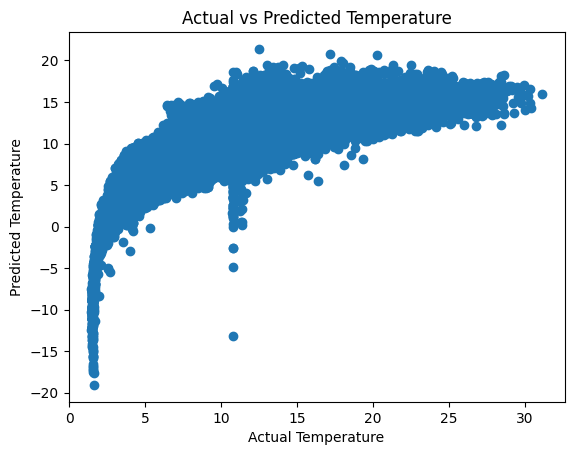

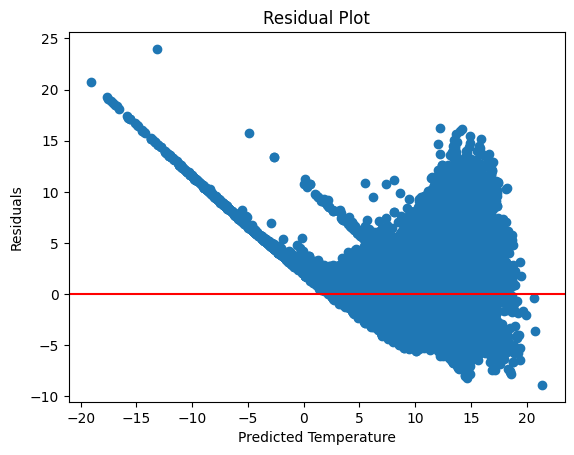

Ridge R2: 0.649279200458081
Lasso R2: 0.6492263454624063


In [4]:
#from google.colab import files
#uploaded = files.upload()


# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset
data = pd.read_csv("bottle.csv.zip")
# Select features and target
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

df = data[features + [target]]
# Handle missing values
df.fillna(df.mean(), inplace=True)

X = df[features]
y = df[target]
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge R2:", r2_score(y_test, ridge_pred))
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R2:", r2_score(y_test, lasso_pred))
